## Iteration 2: Preprocessing

In [22]:
#Imports:
#General imports
import numpy as np
import pandas as pd
import re
import datetime


# Plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [23]:
#Imports:
#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Sklearn metrics
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




In [32]:
def num_col_dist(cols_list, df):
    """
    Plot the distributions of numerical columns in a DataFrame.

    Parameters:
        cols_list (list): A list of column names to plot the distributions.
        df (DataFrame): The DataFrame containing the numerical columns.
    """
    for col in cols_list:
        plt.figure()
        sns.histplot(data=df, x=col, bins=25)
        plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
        plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
        plt.xlabel(col)
        plt.title(col)
        plt.legend()
        plt.show()

In [13]:
dfsellers = pd.read_csv("../data/elenas-it2-postwrangling.csv", index_col="seller_id")
dfsellers.head(5)

,Unnamed: 0,seller_created_at,total_orders,effective_ratio,rto_ratio,return_ratio,cancelled_ratio,departments_sold,number_of_clients,avg_effective_delivery_days,...,avg_cart_items,avg_vendor_discount,number_of_products,number_of_categories,average_prod_existence_days,total_products_shared,number_of_vouchers,number_of_credits,number_of_used_credits,avg_credit_amount
seller_id,,,,,,,,,,,,,,,,,,,,,
11415920,0,2022-09-30,1,1.00,0.00,0.00,0.00,1,1,2.00,...,1.0,0.0,1,1,565.0,0,36,19,0,7526.315789
11415923,1,2022-09-30,70,0.69,0.14,0.01,0.16,4,47,6.73,...,1.0,6418.0,46,16,457.0,112,136,23,1,7434.782609
11415930,2,2022-09-30,2,1.00,0.00,0.00,0.00,1,1,10.00,...,1.0,0.0,2,2,618.0,67,80,35,0,7400.000000
11415933,3,2022-09-30,7,0.43,0.29,0.00,0.29,1,1,3.33,...,1.0,4457.0,7,5,613.0,7,44,17,1,9058.823529
11415940,4,2022-09-30,2,0.50,0.00,0.00,0.50,2,2,9.00,...,1.0,0.0,2,2,310.0,4,45,17,0,7176.470588


In [14]:
print(dfsellers.columns)

Index(['Unnamed: 0', 'seller_created_at', 'total_orders', 'effective_ratio',
       'rto_ratio', 'return_ratio', 'cancelled_ratio', 'departments_sold',
       'number_of_clients', 'avg_effective_delivery_days',
       'total_effective_earnings', 'avg_effective_earnings',
       'avg_client_price', 'avg_shipment_cost', 'total_discount',
       'effective_orders_november', 'effective_orders_december',
       'effective_orders_january', 'effective_orders_february', 'churn',
       'is_referred', 'avg_cart_items', 'avg_vendor_discount',
       'number_of_products', 'number_of_categories',
       'average_prod_existence_days', 'total_products_shared',
       'number_of_vouchers', 'number_of_credits', 'number_of_used_credits',
       'avg_credit_amount'],
      dtype='object')


In [15]:
dfsellers.drop('Unnamed: 0', axis=1, inplace=True)

## Correlations

In [16]:
dfsellers2 = dfsellers.drop(["total_discount", "is_referred", "avg_cart_items"], axis=1)

/var/folders/27/tbf7s19s47137sfh7rlj9pvh0000gn/T/ipykernel_12231/4065650767.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfsellers2.corr().round(2)


Text(0.5, 1.0, 'Correlation matrix')

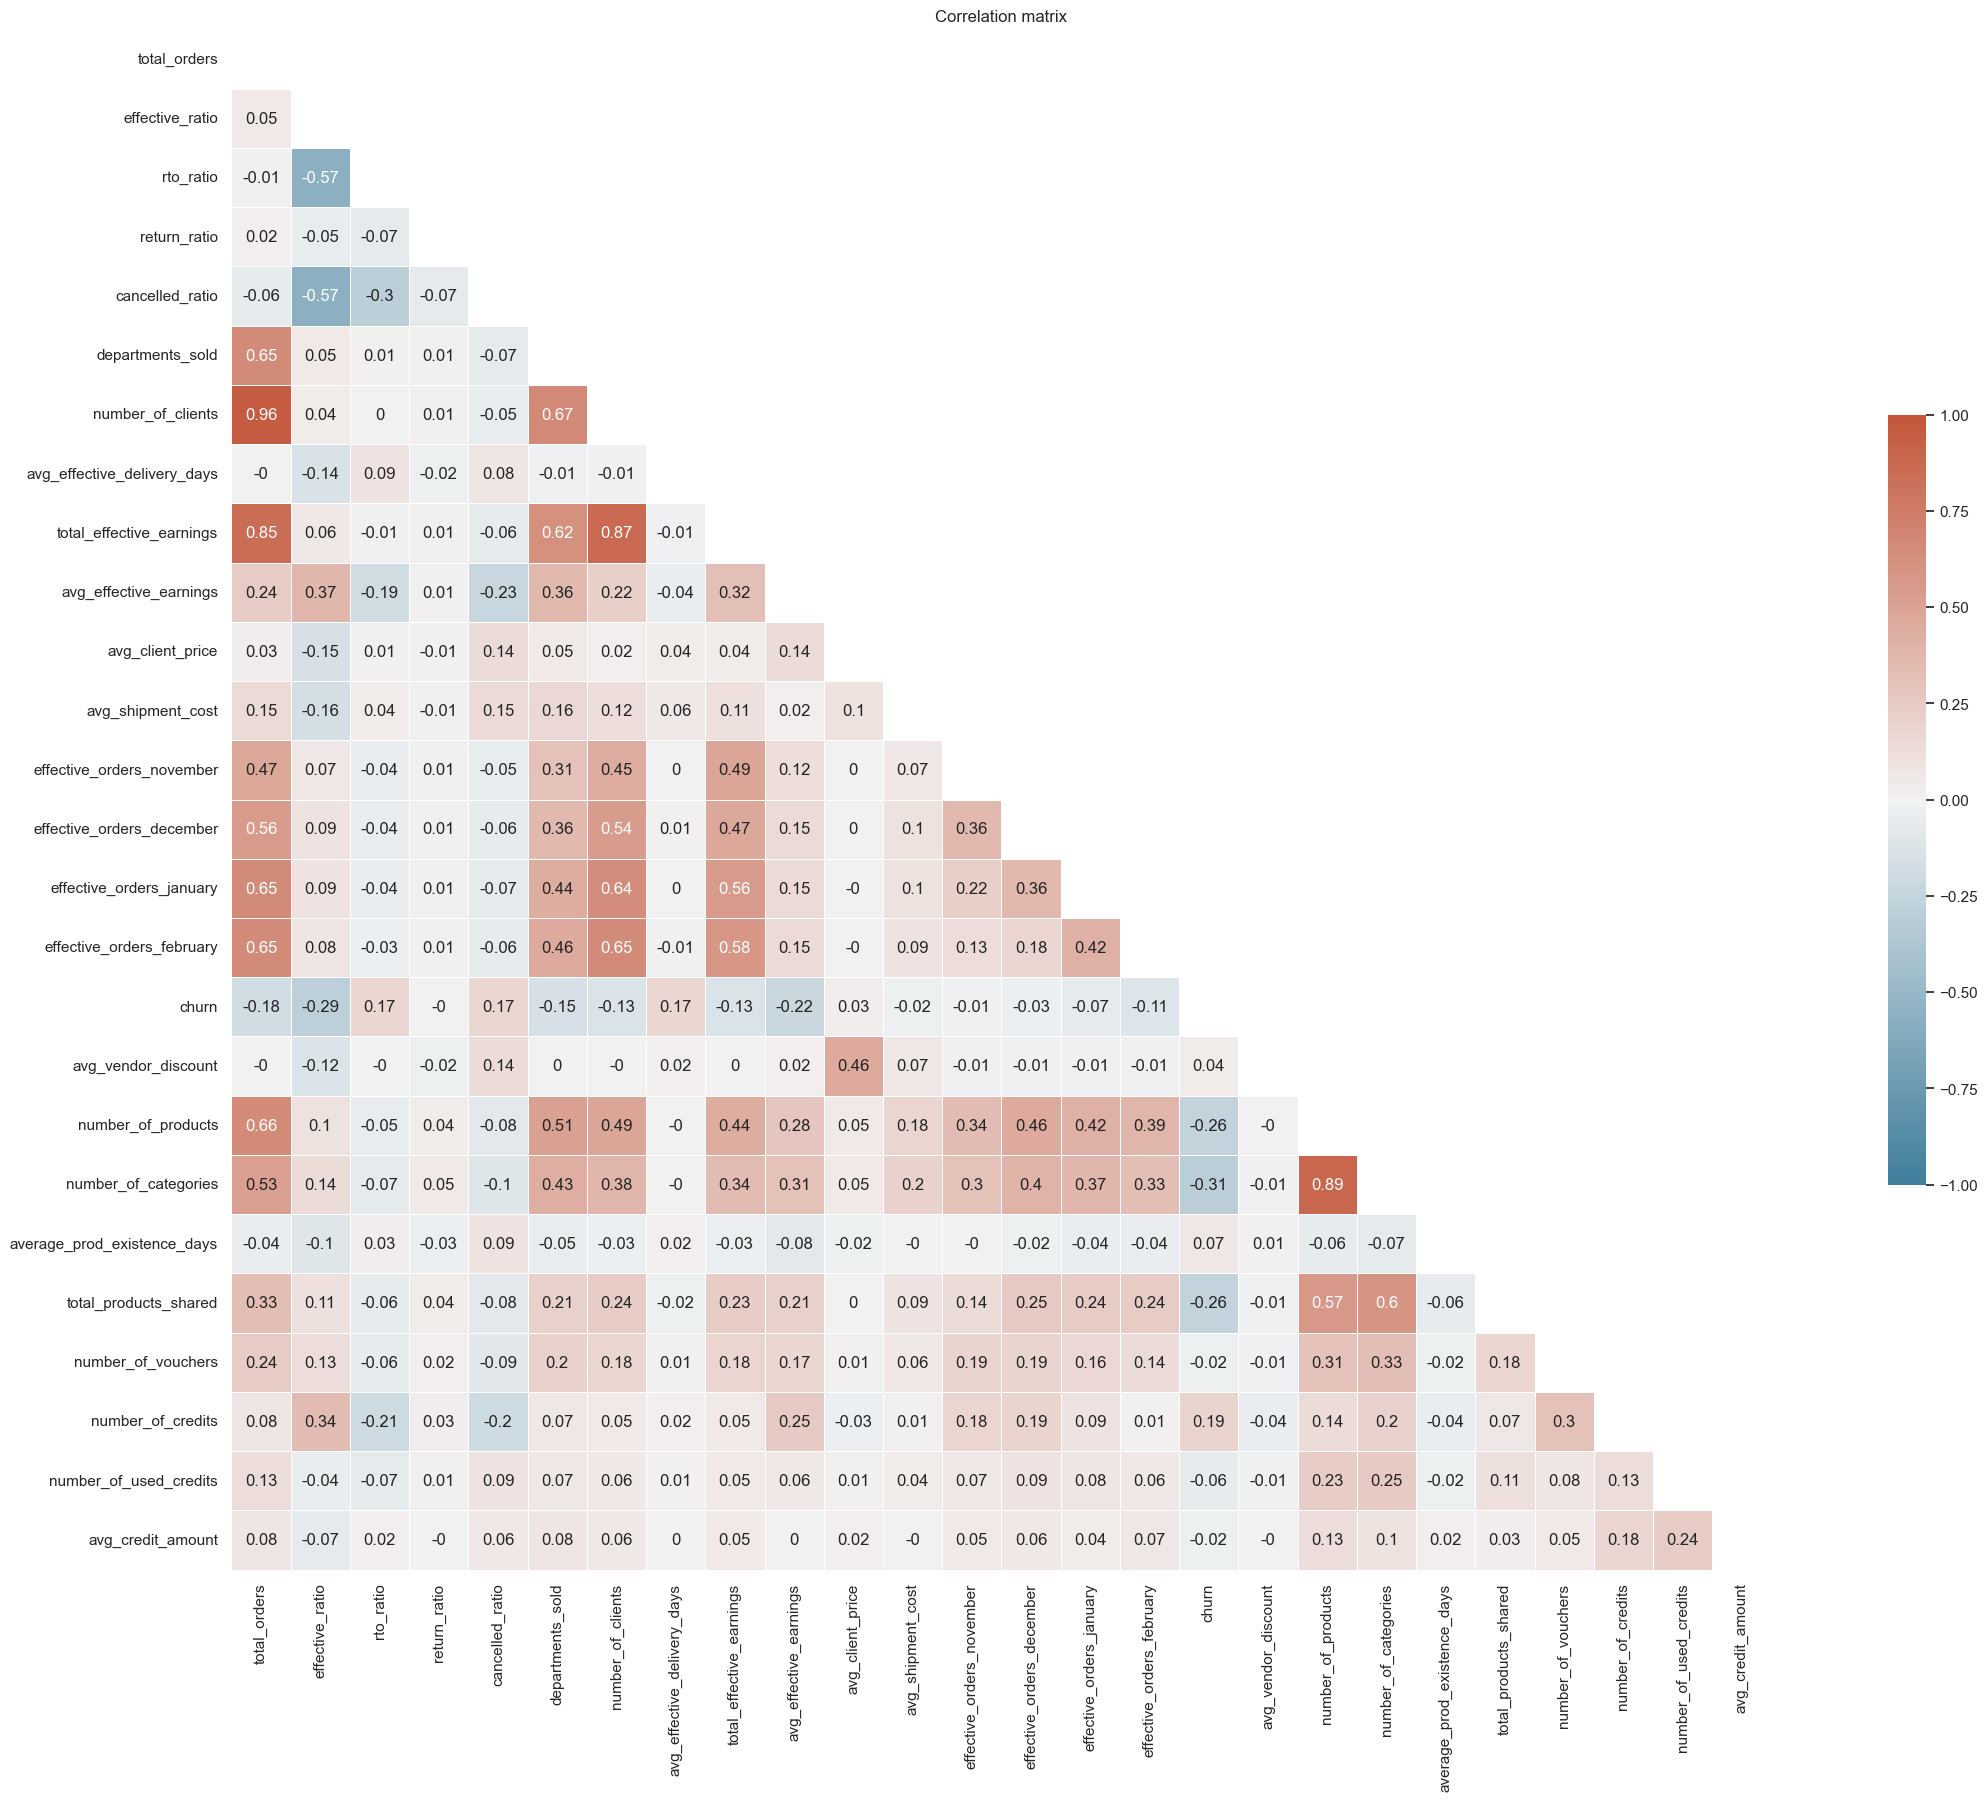

In [17]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = dfsellers2.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Correlation matrix")

To address multicolinearity, I will drop number_of_products and total_orders

Since the operational ratios add 1, return radio will be dropped

In [18]:
#Dropping number of products and total orders
dfsellers.drop(["number_of_products", "total_orders"], axis=1, inplace=True)

In [19]:
#Dropping return ratio
dfsellers.drop("return_ratio", axis=1, inplace=True)

In [25]:
dfsellers["seller_created_at"].dtype

dtype('O')

In [27]:
#Seller created at:
#Seller Created at review:
#Convert to datetime
dfsellers["seller_created_at"] = pd.to_datetime(dfsellers["seller_created_at"])

#Seller creation month:
dfsellers["seller_creation_month"] = dfsellers["seller_created_at"].dt.month

In [28]:
#Days since seller creation

#Seller creation threshold:
seller_creation_threshold = pd.Timestamp("2023-03-30")

#Substracting the dates
dfsellers["days_since_seller_creation"] = (seller_creation_threshold - dfsellers["seller_created_at"])

#Converting into int
dfsellers["days_since_seller_creation"] = dfsellers["days_since_seller_creation"].astype(int)

#sanity check:
dfsellers["days_since_seller_creation"].dtypes

dtype('int64')

In [35]:
dfsellers3 = dfsellers.copy()

In [36]:
dfsellers3.columns

Index(['seller_created_at', 'effective_ratio', 'rto_ratio', 'cancelled_ratio',
       'departments_sold', 'number_of_clients', 'avg_effective_delivery_days',
       'total_effective_earnings', 'avg_effective_earnings',
       'avg_client_price', 'avg_shipment_cost', 'total_discount',
       'effective_orders_november', 'effective_orders_december',
       'effective_orders_january', 'effective_orders_february', 'churn',
       'is_referred', 'avg_cart_items', 'avg_vendor_discount',
       'number_of_categories', 'average_prod_existence_days',
       'total_products_shared', 'number_of_vouchers', 'number_of_credits',
       'number_of_used_credits', 'avg_credit_amount', 'seller_creation_month',
       'days_since_seller_creation'],
      dtype='object')

## Data Distribution:

In [31]:
#Plotting distributions to determine if there are existing power laws
num_cols = dfsellers3.columns.to_list()



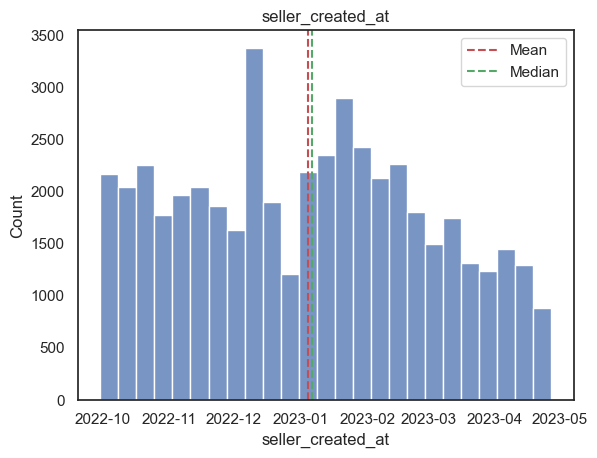

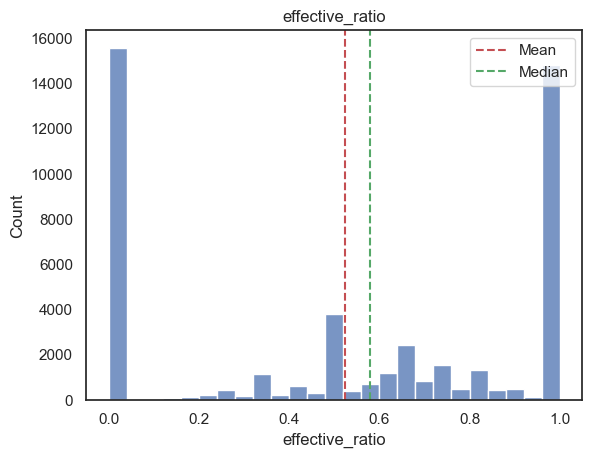

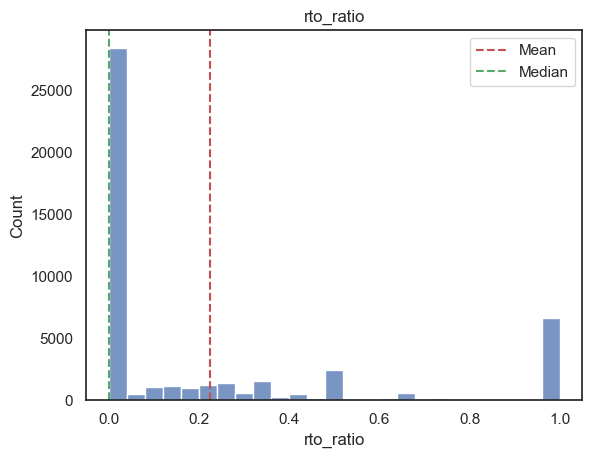

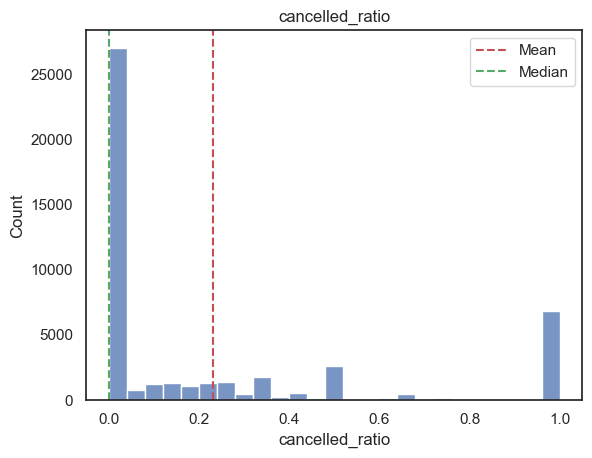

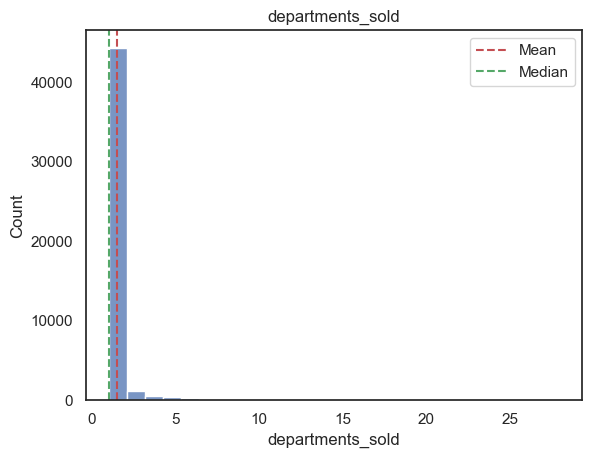

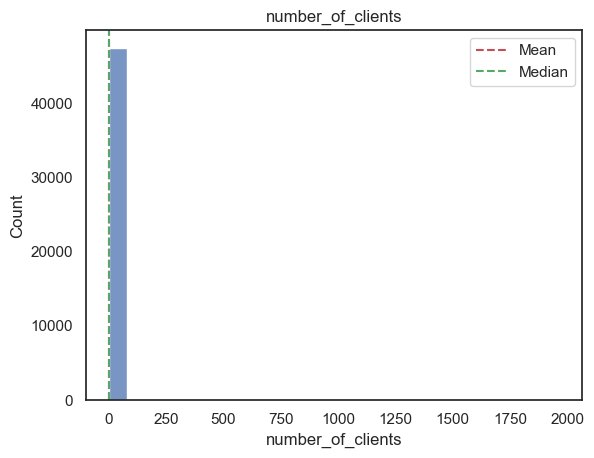

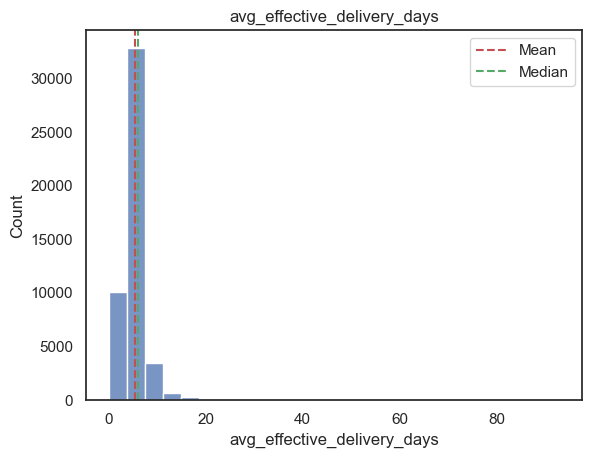

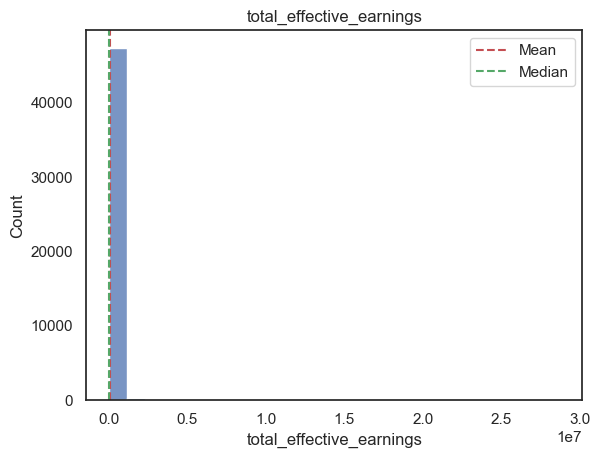

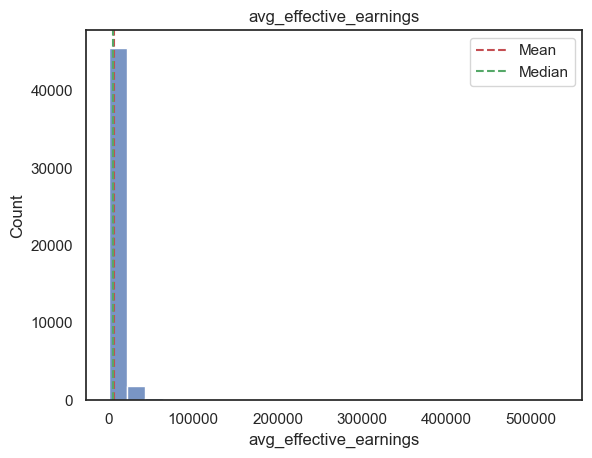

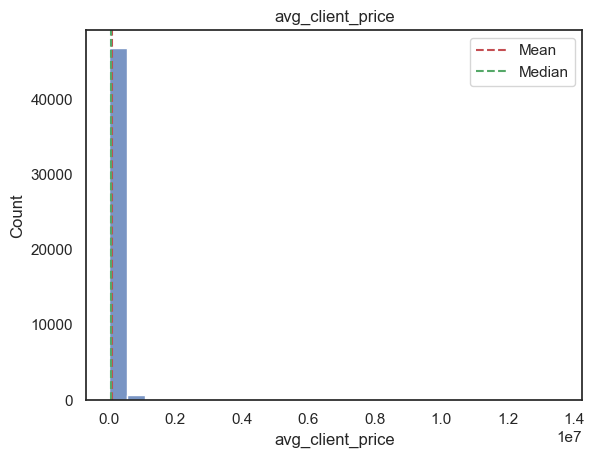

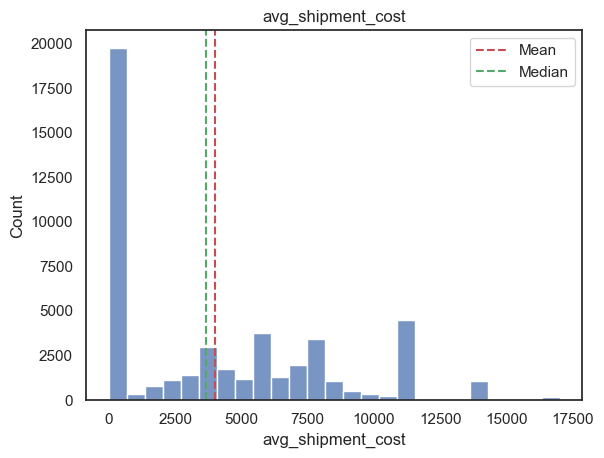

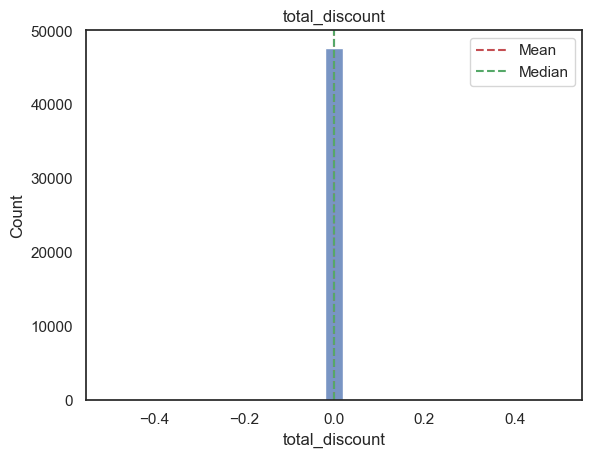

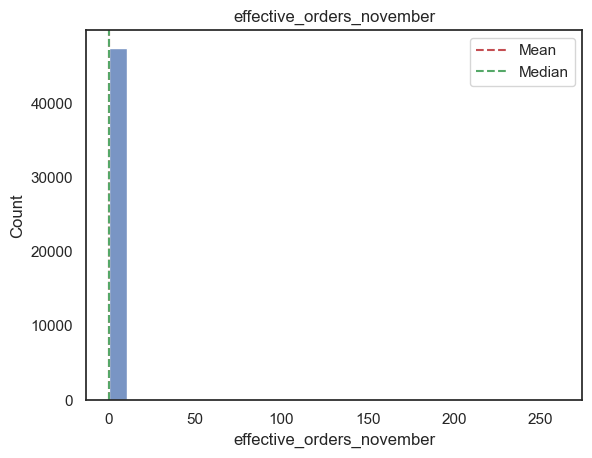

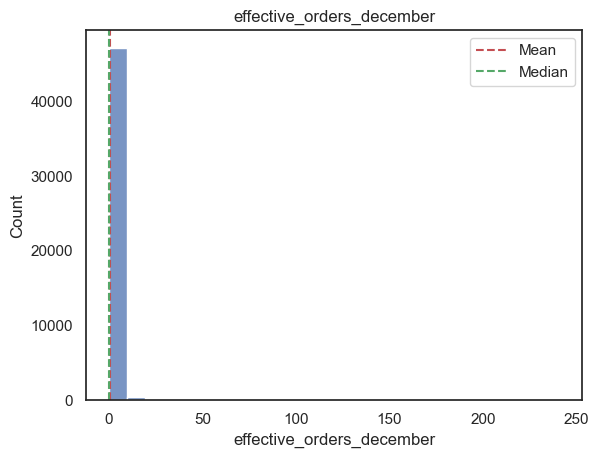

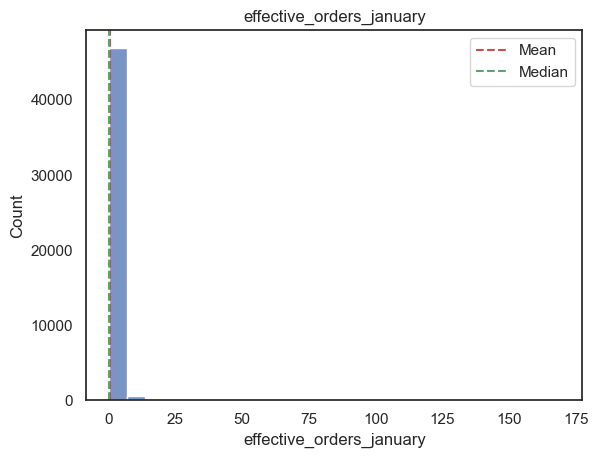

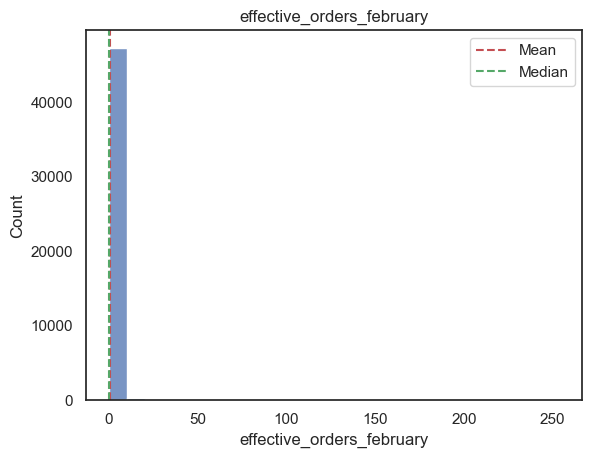

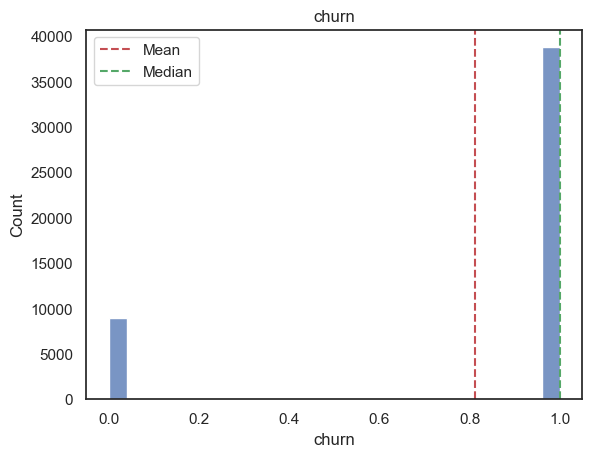

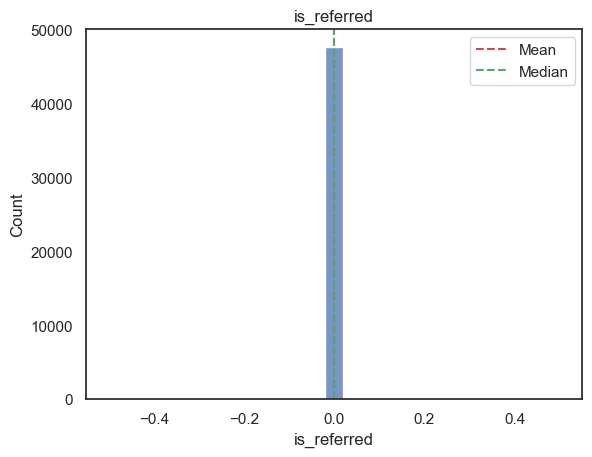

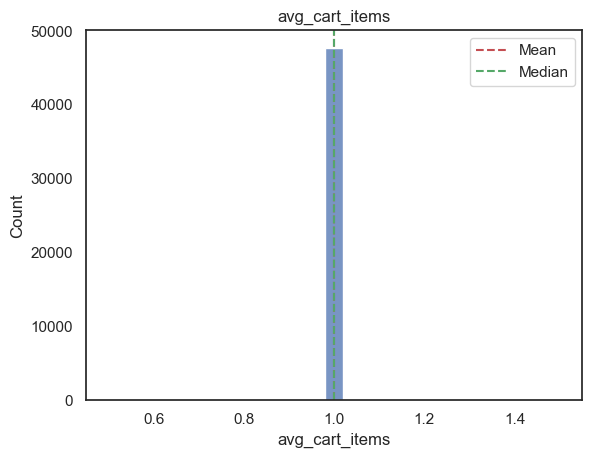

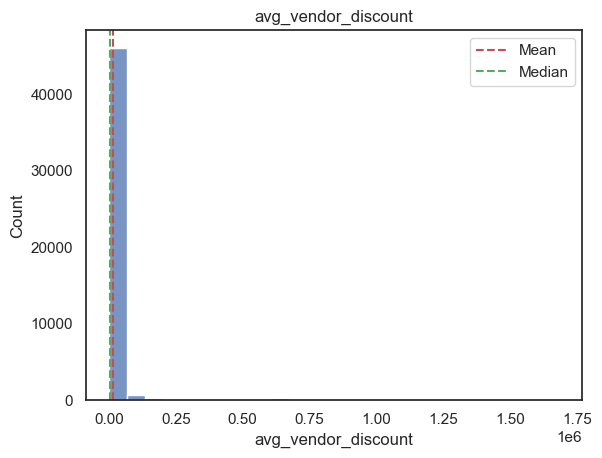

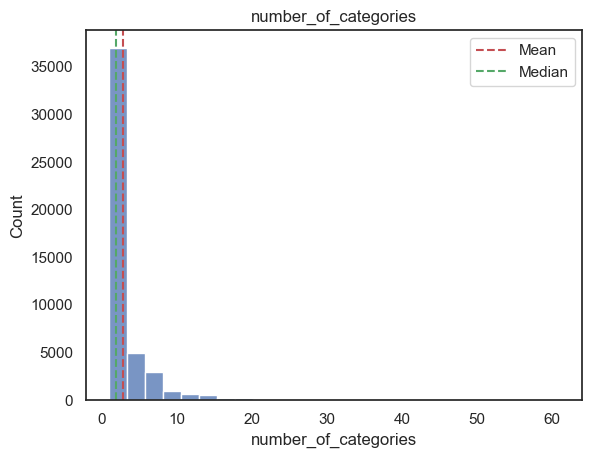

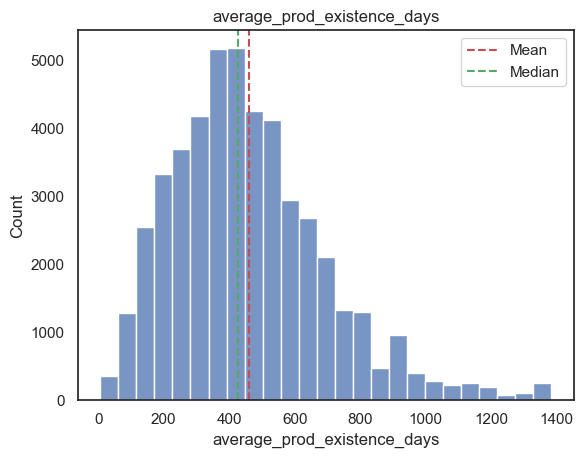

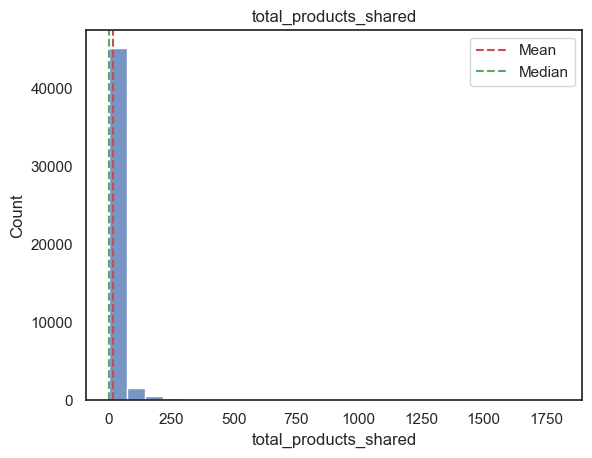

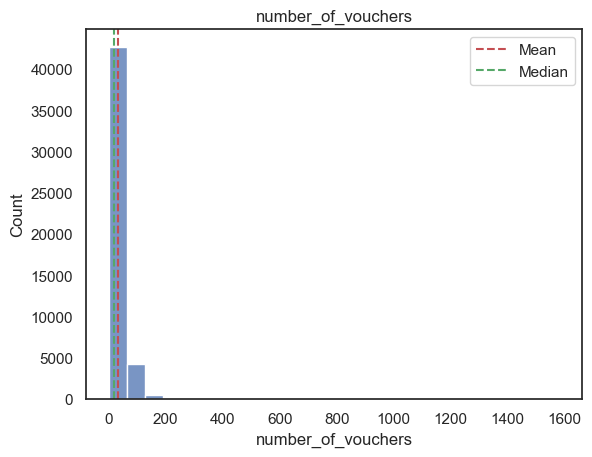

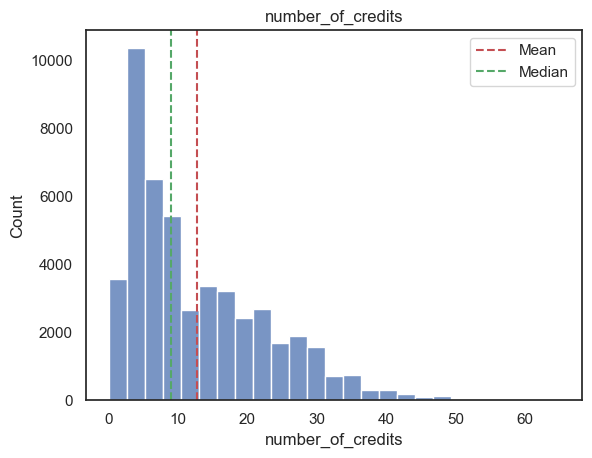

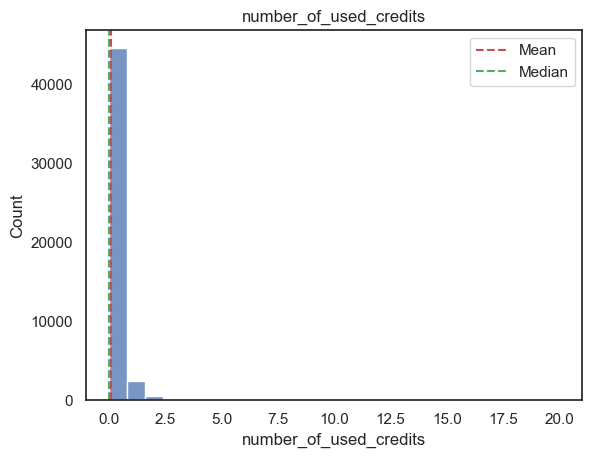

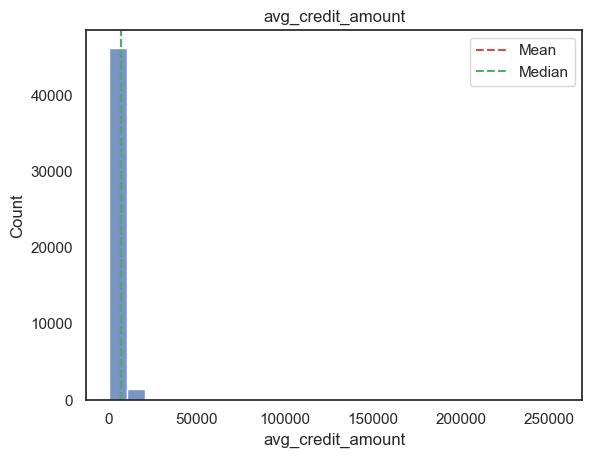

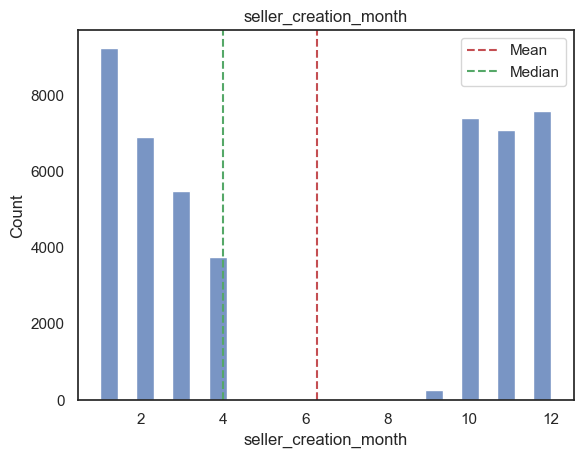

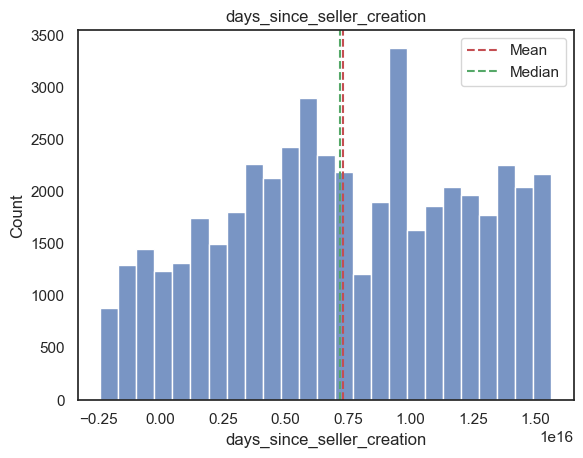

In [39]:
num_col_dist(num_cols, dfsellers3)

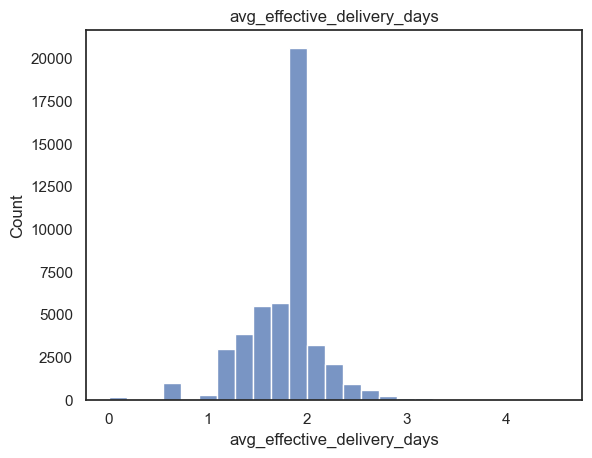

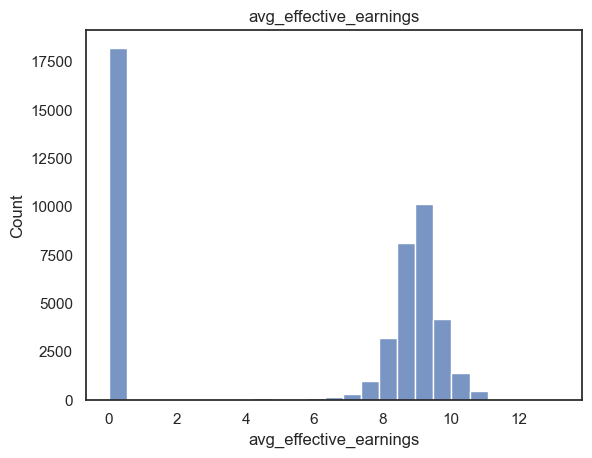

In [44]:
# Applying log transformation
log_cols = ["avg_effective_delivery_days", "avg_effective_earnings"]

for c in log_cols:
    plt.figure()
    sns.histplot(data=np.log1p(dfsellers3[c]), bins=25)
    plt.xlabel(c)
    plt.title(c)
    plt.show()

In [45]:
#Log transformation:
#Avg effective delivery days
dfsellers3["avg_effective_delivery_days"] = np.log(dfsellers3["avg_effective_delivery_days"]+1)

#Avg effective earnings
dfsellers3["avg_effective_earnings"] = np.log(dfsellers3["avg_effective_earnings"]+1)

In [46]:
#Checkpoint:
dfsellers3.to_csv('../Data/elenas-it2-postpreprocessing.csv')

In [47]:
dfsellers3.columns

Index(['seller_created_at', 'effective_ratio', 'rto_ratio', 'cancelled_ratio',
       'departments_sold', 'number_of_clients', 'avg_effective_delivery_days',
       'total_effective_earnings', 'avg_effective_earnings',
       'avg_client_price', 'avg_shipment_cost', 'total_discount',
       'effective_orders_november', 'effective_orders_december',
       'effective_orders_january', 'effective_orders_february', 'churn',
       'is_referred', 'avg_cart_items', 'avg_vendor_discount',
       'number_of_categories', 'average_prod_existence_days',
       'total_products_shared', 'number_of_vouchers', 'number_of_credits',
       'number_of_used_credits', 'avg_credit_amount', 'seller_creation_month',
       'days_since_seller_creation'],
      dtype='object')